In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
#doing an api call to get data
r = requests.get('https://api.covid19api.com/country/singapore/status/confirmed?from=2020-01-01T00:00:00Z&to=2021-04-01T00:00:00Z')
r

<Response [200]>

In [3]:
#raw data
print(r.text)

[{"Country":"Singapore","CountryCode":"SG","Province":"","City":"","CityCode":"","Lat":"1.35","Lon":"103.82","Cases":0,"Status":"confirmed","Date":"2020-01-22T00:00:00Z"},{"Country":"Singapore","CountryCode":"SG","Province":"","City":"","CityCode":"","Lat":"1.35","Lon":"103.82","Cases":1,"Status":"confirmed","Date":"2020-01-23T00:00:00Z"},{"Country":"Singapore","CountryCode":"SG","Province":"","City":"","CityCode":"","Lat":"1.35","Lon":"103.82","Cases":3,"Status":"confirmed","Date":"2020-01-24T00:00:00Z"},{"Country":"Singapore","CountryCode":"SG","Province":"","City":"","CityCode":"","Lat":"1.35","Lon":"103.82","Cases":3,"Status":"confirmed","Date":"2020-01-25T00:00:00Z"},{"Country":"Singapore","CountryCode":"SG","Province":"","City":"","CityCode":"","Lat":"1.35","Lon":"103.82","Cases":4,"Status":"confirmed","Date":"2020-01-26T00:00:00Z"},{"Country":"Singapore","CountryCode":"SG","Province":"","City":"","CityCode":"","Lat":"1.35","Lon":"103.82","Cases":5,"Status":"confirmed","Date":"20

In [4]:
#extract it into a dataframe
import json 

x = r.json()
df = pd.read_json(json.dumps(x))
df.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,Singapore,SG,,,,1.35,103.82,0,confirmed,2020-01-22 00:00:00+00:00
1,Singapore,SG,,,,1.35,103.82,1,confirmed,2020-01-23 00:00:00+00:00
2,Singapore,SG,,,,1.35,103.82,3,confirmed,2020-01-24 00:00:00+00:00
3,Singapore,SG,,,,1.35,103.82,3,confirmed,2020-01-25 00:00:00+00:00
4,Singapore,SG,,,,1.35,103.82,4,confirmed,2020-01-26 00:00:00+00:00


In [5]:
#we are only interested in Cases and Date
df_case = df[['Date', 'Cases']]
df_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    436 non-null    datetime64[ns, UTC]
 1   Cases   436 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(1)
memory usage: 6.9 KB


In [6]:
df_case.head()

,Date,Cases
0,2020-01-22 00:00:00+00:00,0
1,2020-01-23 00:00:00+00:00,1
2,2020-01-24 00:00:00+00:00,3
3,2020-01-25 00:00:00+00:00,3
4,2020-01-26 00:00:00+00:00,4


In [7]:
df_case.tail()

,Date,Cases
431,2021-03-28 00:00:00+00:00,60300
432,2021-03-29 00:00:00+00:00,60321
433,2021-03-30 00:00:00+00:00,60347
434,2021-03-31 00:00:00+00:00,60381
435,2021-04-01 00:00:00+00:00,60381


The number of cases in the dataframe is culmulative we need to sperate them to get new cases

In [8]:
df_case['new_cases'] = df_case.Cases.diff()

<ipython-input-8-1ade12edda88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case['new_cases'] = df_case.Cases.diff()


In [9]:
df_case.head()

,Date,Cases,new_cases
0,2020-01-22 00:00:00+00:00,0,NaN
1,2020-01-23 00:00:00+00:00,1,1.0
2,2020-01-24 00:00:00+00:00,3,2.0
3,2020-01-25 00:00:00+00:00,3,0.0
4,2020-01-26 00:00:00+00:00,4,1.0


In [10]:
df_case['new_cases'] = df_case['new_cases'].fillna(0)

<ipython-input-10-05be1503226b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_case['new_cases'] = df_case['new_cases'].fillna(0)


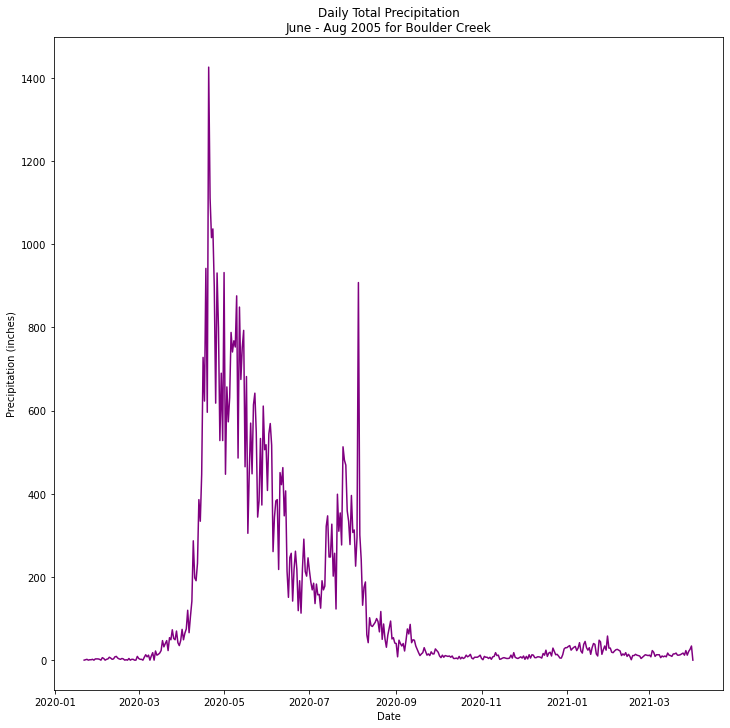

In [11]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.plot(df_case['Date'], df_case['new_cases'], color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek")

plt.show()

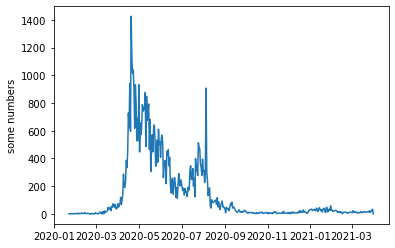

In [12]:
plt.plot(df_case['Date'], df_case['new_cases'])
plt.ylabel('some numbers')
plt.show()